In [8]:
import pandas as pd

# Leer la base de datos
df = pd.read_excel('/Users/macbook/Desktop/UdeSa/Materias/Big data/Big-Data/TP2/EPH_usu_1er_Trim_2023/usu_individual_T123.xlsx')

# Filtrar observaciones
df_filtrado = df[df['AGLOMERADO'].isin([32, 33])]

df_filtrado.head()  # Mostramos las primeras filas del dataframe filtrado


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082


In [22]:
# 3. Limpiar las observaciones
df_limpiado = df_filtrado[(df_filtrado['CH06'] >= 0) & (df_filtrado['ITF'] >= 0)]

df_limpio = df_limpiado[
    (df_limpiado['ESTADO'] != 0) & # 0 = Entrevista individual no realizada (no respuesta al cuestionario individual)
    (df_limpiado['NIVEL_ED'] != 9) & # 9 = Ns/Nr 
    (df_limpiado['CH08'] != 9) # 9 = Ns/Nr
]



,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,NaN,8,254000.00,10,NaN,10,10.0,NaN,10,1516
48598,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48599,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48600,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


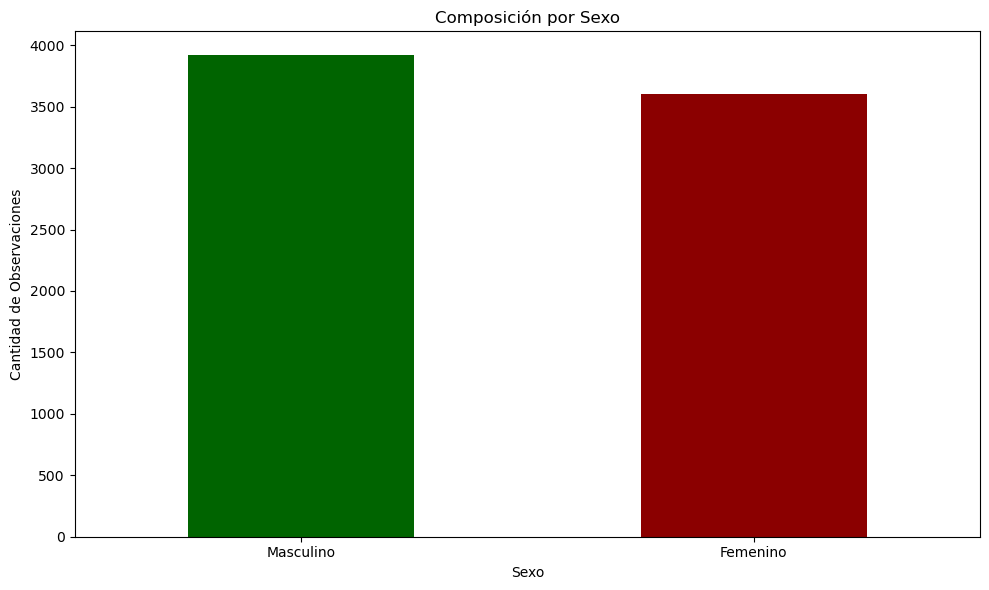

In [23]:
import matplotlib.pyplot as plt

# Contar las observaciones por sexo
sex_counts = df_limpio['CH04'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sex_counts.plot(kind='bar', color=['darkgreen', 'darkred'])
plt.title('Composición por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Observaciones')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Femenino'], rotation=0)
plt.tight_layout()

plt.show()

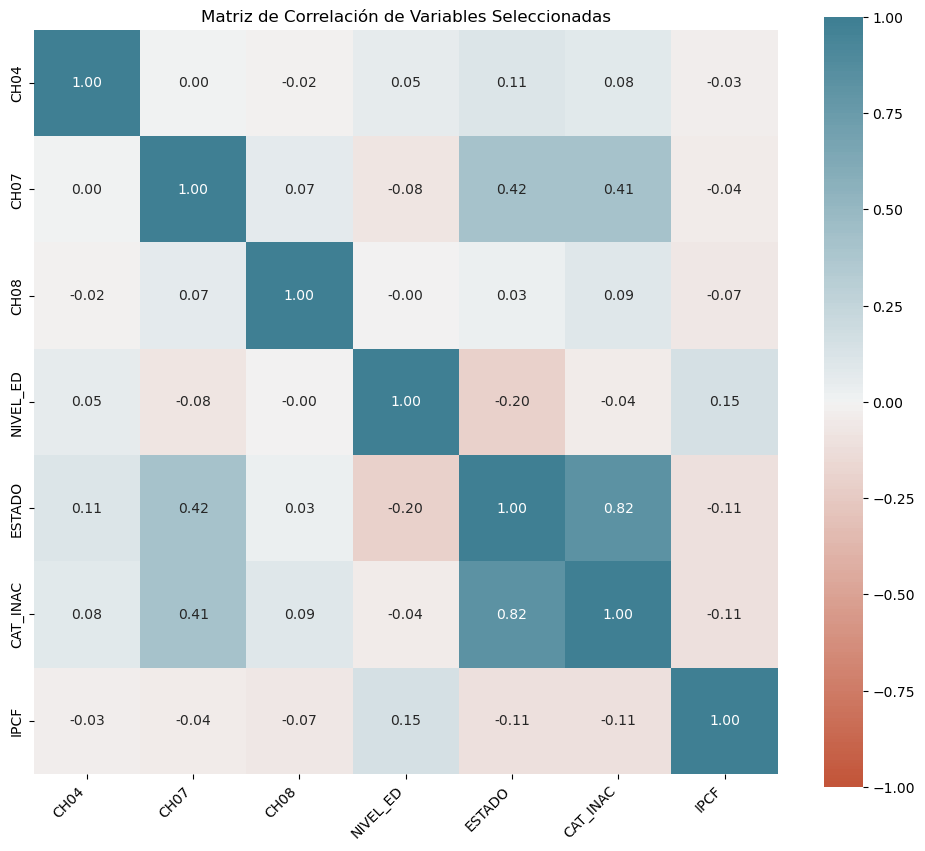

In [28]:
# 2.d, Seleccionamos solo las columnas de interés

# Matriz de correlación
import seaborn as sns

seleccion_variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
df_matriz = df_limpio[seleccion_variables]

# Calculamos la matriz de correlación para estas columnas
corr_corrected = df_matriz.corr()

# Creamos el heatmap (mapa de calor) con seaborn
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    corr_corrected, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Matriz de Correlación de Variables Seleccionadas")
plt.show()